In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from string import ascii_letters
import seaborn as sns


# import plotly.express as px
# import plotly.graph_objects as go
# px.set_mapbox_access_token(open('mapbox_token.txt').read())

In [10]:
tripdata_raw = pd.read_csv('/Users/bkuo/Local Documents/Bootcamp 2020/Project/Capstone/CitiBikeCapStone/Data/Trip data/202011-citibike-tripdata.csv')

In [11]:
tripdata_raw.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,521,2020-11-01 00:00:07.0150,2020-11-01 00:08:48.3010,3467,W Broadway & Spring St,40.724947,-74.001659,350,Clinton St & Grand St,40.715595,-73.987030,40405,Subscriber,1989,1
1,492,2020-11-01 00:00:10.8080,2020-11-01 00:08:23.3170,3557,40 Ave & 9 St,40.757420,-73.945133,3557,40 Ave & 9 St,40.757420,-73.945133,46504,Subscriber,1970,2
2,1979,2020-11-01 00:00:14.7040,2020-11-01 00:33:14.1640,3085,Roebling St & N 4 St,40.714690,-73.957390,3854,Morgan Ave & Maspeth Ave,40.716657,-73.936370,37452,Subscriber,1989,2
3,2382,2020-11-01 00:00:14.7070,2020-11-01 00:39:57.0030,3783,Cliff St & Fulton St,40.708380,-74.004950,3167,Amsterdam Ave & W 73 St,40.779668,-73.980930,40417,Subscriber,1981,1
4,166,2020-11-01 00:00:15.9690,2020-11-01 00:03:02.8980,422,W 59 St & 10 Ave,40.770513,-73.988038,3175,W 70 St & Amsterdam Ave,40.777480,-73.982886,35776,Subscriber,1990,1


In [ ]:
# stn_dist.to_csv('station_distance')

In [4]:
# dock station status
stations_cleaned = pd.read_csv('/Users/bkuo/Local Documents/Bootcamp 2020/Project/Capstone/CitiBikeCapStone/Data/Dock station data/stations_cleaned.csv')
#             delim_whitespace = True)
stations_cleaned.head()


/Users/bkuo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,dock_id,dock_name,date,hour,minute,avail_bikes,avail_docks,tot_docks,_lat,_long,in_service,status_key,dock_status,time,dayofweek,dayofweek2,season
0,72,W 52 St & 11 Ave,2015-03-01,1,6,8,31,39,40.767272,-73.993929,1,1,Empty Alert,1:6,6,Sunday,spring
1,72,W 52 St & 11 Ave,2015-03-01,1,16,8,31,39,40.767272,-73.993929,1,1,Empty Alert,1:16,6,Sunday,spring
2,72,W 52 St & 11 Ave,2015-03-01,1,25,8,30,38,40.767272,-73.993929,1,1,Empty Alert,1:25,6,Sunday,spring
3,72,W 52 St & 11 Ave,2015-03-01,1,35,8,30,38,40.767272,-73.993929,1,1,Empty Alert,1:35,6,Sunday,spring
4,72,W 52 St & 11 Ave,2015-03-01,1,45,8,30,38,40.767272,-73.993929,1,1,Empty Alert,1:45,6,Sunday,spring


In [5]:
dock = stations_cleaned.copy()
# dock['hour24'] = dock.hour
# dock[dock['hour24'] != 12].loc[dock.pm == 1, 'hour24'] = dock.hour24 + 12
dock.hour = dock.hour.astype(str).apply(lambda x: x.zfill(2))
dock.loc[dock['hour'] == '24', 'hour'] = '00'
dock.minute = dock.minute.astype(str).apply(lambda x: x.zfill(2))
dock['time'] = dock.hour + ':' + dock.minute + ':' +  '00'
dock['datetime'] = pd.to_datetime(dock['date'] + ' ' + dock['time'])
dock = dock.drop(['date', 'hour', 'minute', 'time'], axis = 1)
dock.head()

,dock_id,dock_name,avail_bikes,avail_docks,tot_docks,_lat,_long,in_service,status_key,dock_status,dayofweek,dayofweek2,season,datetime
0,72,W 52 St & 11 Ave,8,31,39,40.767272,-73.993929,1,1,Empty Alert,6,Sunday,spring,2015-03-01 01:06:00
1,72,W 52 St & 11 Ave,8,31,39,40.767272,-73.993929,1,1,Empty Alert,6,Sunday,spring,2015-03-01 01:16:00
2,72,W 52 St & 11 Ave,8,30,38,40.767272,-73.993929,1,1,Empty Alert,6,Sunday,spring,2015-03-01 01:25:00
3,72,W 52 St & 11 Ave,8,30,38,40.767272,-73.993929,1,1,Empty Alert,6,Sunday,spring,2015-03-01 01:35:00
4,72,W 52 St & 11 Ave,8,30,38,40.767272,-73.993929,1,1,Empty Alert,6,Sunday,spring,2015-03-01 01:45:00


In [6]:
dock.describe()

,dock_id,avail_bikes,avail_docks,tot_docks,_lat,_long,in_service,dayofweek
count,3.239142e+07,3.239142e+07,3.239142e+07,3.239142e+07,3.239142e+07,3.239142e+07,3.239142e+07,3.239142e+07
mean,1.505113e+03,1.121125e+01,1.963295e+01,3.179422e+01,4.072800e+01,-7.398373e+01,9.560140e-01,3.025526e+00
std,1.365721e+03,1.063801e+01,1.338239e+01,1.175093e+01,7.818515e-02,1.073389e-01,2.050640e-01,1.984087e+00
min,7.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-7.409694e+01,0.000000e+00,0.000000e+00
25%,3.600000e+02,2.000000e+00,9.000000e+00,2.400000e+01,4.070531e+01,-7.399695e+01,1.000000e+00,1.000000e+00
50%,4.950000e+02,8.000000e+00,1.800000e+01,3.100000e+01,4.072521e+01,-7.398336e+01,1.000000e+00,3.000000e+00
75%,3.132000e+03,1.800000e+01,2.800000e+01,3.900000e+01,4.075038e+01,-7.396592e+01,1.000000e+00,5.000000e+00
max,3.534000e+03,1.160000e+02,7.900000e+01,9.800000e+01,4.407427e+02,7.397713e+01,1.000000e+00,6.000000e+00


In [7]:
#dock.to_csv('stations_more_clean')

In [4]:
stations_more_clean = pd.read_csv('stations_more_clean')
stations_more_clean.head()

/Users/bkuo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,dock_id,dock_name,avail_bikes,avail_docks,tot_docks,_lat,_long,in_service,status_key,dock_status,dayofweek,dayofweek2,season,datetime
0,0,72,W 52 St & 11 Ave,8,31,39,40.767272,-73.993929,1,1,Empty Alert,6,Sunday,spring,2015-03-01 01:06:00
1,1,72,W 52 St & 11 Ave,8,31,39,40.767272,-73.993929,1,1,Empty Alert,6,Sunday,spring,2015-03-01 01:16:00
2,2,72,W 52 St & 11 Ave,8,30,38,40.767272,-73.993929,1,1,Empty Alert,6,Sunday,spring,2015-03-01 01:25:00
3,3,72,W 52 St & 11 Ave,8,30,38,40.767272,-73.993929,1,1,Empty Alert,6,Sunday,spring,2015-03-01 01:35:00
4,4,72,W 52 St & 11 Ave,8,30,38,40.767272,-73.993929,1,1,Empty Alert,6,Sunday,spring,2015-03-01 01:45:00


In [5]:
dock = stations_more_clean
dock = dock.drop(['Unnamed: 0', '_lat', '_long'], axis = 1)
dock.datetime= pd.to_datetime(dock.datetime)

In [6]:
dock['perc_bike_avail'] = dock.avail_bikes/dock.tot_docks

In [5]:
# downsample:
#dock = dock.sample(frac = 0.1, replace=True)

In [6]:
# smaller time frame:
# start_date = '01-01-2018'
# end_date = '12-31-2018'
# mask = (dock['datetime'] > start_date) & (dock['datetime'] <= end_date)
# dock = dock.loc[mask]

In [7]:
# time of days
time_of_day = dock.copy()
time_of_day = time_of_day[['datetime','perc_bike_avail']]
time_of_day['hour'] = time_of_day['datetime'].dt.hour
time_of_day['peak'] = [1 if time > 5 and time < 20 else 0 for time in time_of_day.hour]


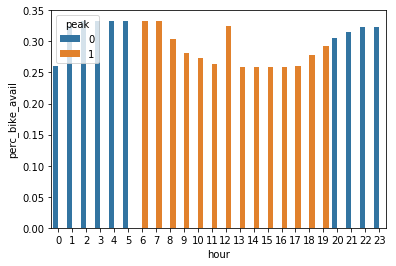

In [8]:
# bike availability during peak (median value)

bka = time_of_day[['perc_bike_avail', 'hour', 'peak']].groupby('hour').median()
bka = bka.reset_index()
sns.barplot(data = bka, x = 'hour', y = "perc_bike_avail", hue = 'peak' )

# g.sns.set(rc={'figure.figsize':(12,8)})


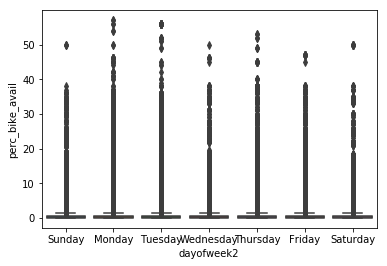

In [8]:
# day of week

# plt = dock[['dayofweek2', 'perc_bike_avail']].groupby('dayofweek2').median()

sns.boxplot(data = dock, x = 'dayofweek2', y = "perc_bike_avail")


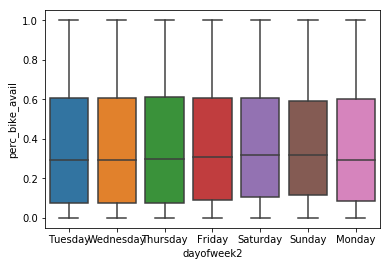

In [17]:
# day of week median availability excluding 2015
dock_no2015 = dock[dock['datetime'].dt.year != 2015]
sns.boxplot(data = dock_no2015, x = 'dayofweek2', y = "perc_bike_avail")

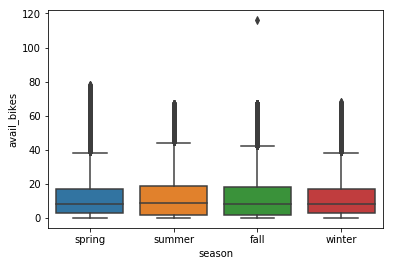

In [16]:
# seasonal bike number
sns.boxplot(data = dock, x = 'season', y = "avail_bikes")
avail_docks

In [21]:
dock.columns

Index(['dock_id', 'dock_name', 'avail_bikes', 'avail_docks', 'tot_docks',
       'in_service', 'status_key', 'dock_status', 'dayofweek', 'dayofweek2',
       'season', 'datetime', 'perc_bike_avail'],
      dtype='object')

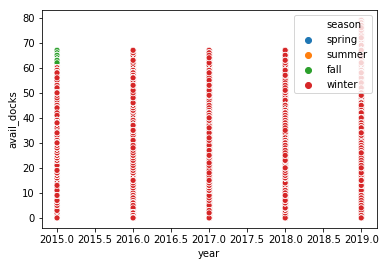

In [9]:
# seasonal dock number
season = dock.copy()
season['year'] = season.datetime.dt.year
sns.scatterplot(data = season, x = 'year', y = "avail_docks", hue = 'season')


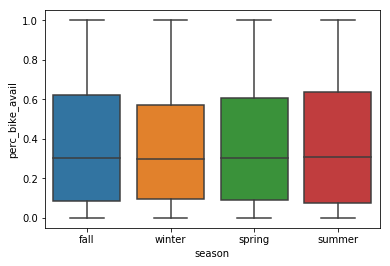

In [12]:
# season availability ex 2015
sns.boxplot(data = dock_no2015, x = 'season', y = "perc_bike_avail")

/Users/bkuo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


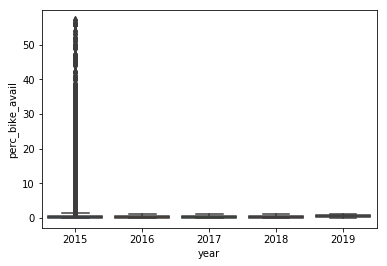

In [13]:
# yearly comparison
yr = dock[['datetime', 'perc_bike_avail']]
yr['year']= yr.datetime.dt.year
sns.boxplot(data = yr, x = 'year', y = "perc_bike_avail")



/Users/bkuo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


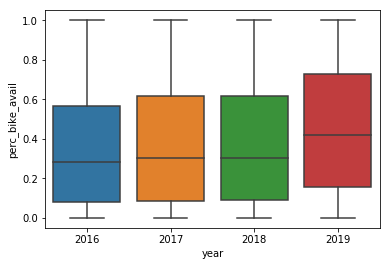

In [14]:
# yearly comparison no 2015
yr = dock_no2015[['datetime', 'perc_bike_avail']]
yr['year']= yr.datetime.dt.year
sns.boxplot(data = yr, x = 'year', y = "perc_bike_avail")



In [15]:
# # sns.set_theme(style="white")

# # Generate a large random dataset

# d = pd.DataFrame(dock,
#                  columns=list(ascii_letters[26:]))

# # Compute the correlation matrix
# corr = d.corr()

# # Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(corr, dtype=bool))

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})

(array([735719., 735903., 736085., 736269., 736450., 736634., 736815.,
        736999., 737180.]), <a list of 9 Text xticklabel objects>)

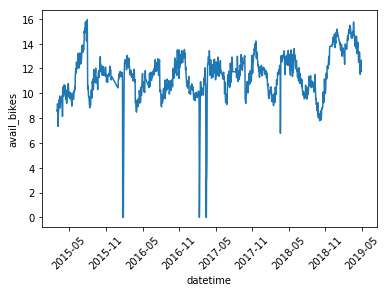

In [16]:
# daily average of bikes/docks
mday = dock.groupby(pd.Grouper(key="datetime", freq="D"))\
    .agg({'avail_bikes':'mean',
          'avail_docks':'mean'})
df = mday

# day vs available bikes
sns.lineplot(data=df, x=df.index, y=df.avail_bikes)
plt.xticks(rotation=45)

(array([735719., 735903., 736085., 736269., 736450., 736634., 736815.,
        736999., 737180.]), <a list of 9 Text xticklabel objects>)

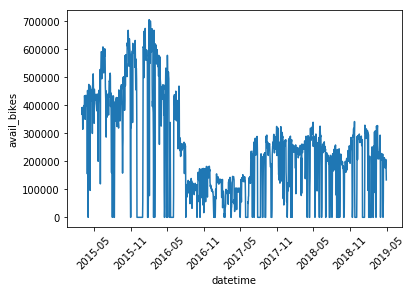

In [17]:
# daily total bikes/docks
day = dock.groupby(pd.Grouper(key="datetime", freq="D"))\
    .agg({'avail_bikes':'sum',
          'avail_docks':'sum',
          'tot_docks':'sum'})
df = day

# day vs available bikes
sns.lineplot(data=df, x=df.index, y=df.avail_bikes)
plt.xticks(rotation=45)


# fig = px.bar(df, x = df.index, y = "avail_bikes")
# fig.show()
# fig = px.bar(df, x = df.index, y = "avail_docks")
# fig.show()
# fig = px.bar(df, x = df.index, y = "tot_docks")
# fig.show()

(array([735719., 735903., 736085., 736269., 736450., 736634., 736815.,
        736999., 737180.]), <a list of 9 Text xticklabel objects>)

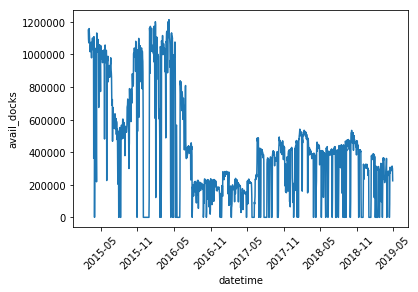

In [18]:
# day vs available docks
sns.lineplot(data=df, x=df.index, y=df.avail_docks)
plt.xticks(rotation=45)


(array([735719., 735903., 736085., 736269., 736450., 736634., 736815.,
        736999., 737180.]), <a list of 9 Text xticklabel objects>)

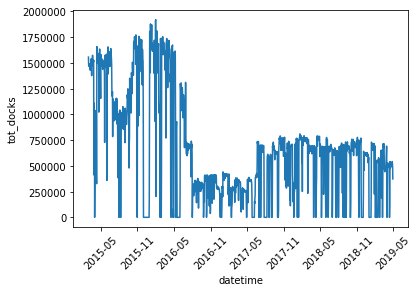

In [19]:
# day vs total docks
sns.lineplot(data=df, x=df.index, y=df.tot_docks)
plt.xticks(rotation=45)

(array([735719., 735903., 736085., 736269., 736450., 736634., 736815.,
        736999., 737180.]), <a list of 9 Text xticklabel objects>)

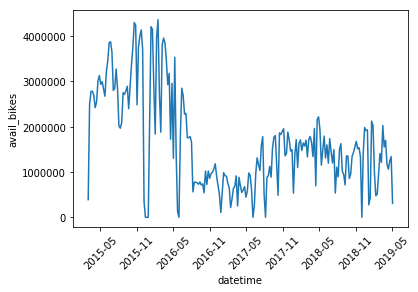

In [20]:
# week
wk = dock.groupby(pd.Grouper(key = "datetime", freq="W"))\
    .agg({'avail_bikes':'sum',
          'avail_docks':'sum',
          'tot_docks':'sum'})
df = wk

# week vs. total docks
sns.lineplot(data=df, x=df.index, y=df.avail_bikes)
plt.xticks(rotation=45)

# fig = px.bar(df, x = df.index, y = "avail_bikes")
# fig.show()
# fig = px.bar(df, x = df.index, y = "avail_docks")
# fig.show()
# fig = px.bar(df, x = df.index, y = "tot_docks")
# fig.show()

(array([735719., 735903., 736085., 736269., 736450., 736634., 736815.,
        736999., 737180.]), <a list of 9 Text xticklabel objects>)

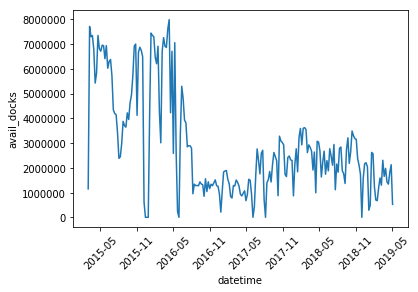

In [21]:
# week vs available docks
sns.lineplot(data=df, x=df.index, y=df.avail_docks)
plt.xticks(rotation=45)



(array([735719., 735903., 736085., 736269., 736450., 736634., 736815.,
        736999., 737180.]), <a list of 9 Text xticklabel objects>)

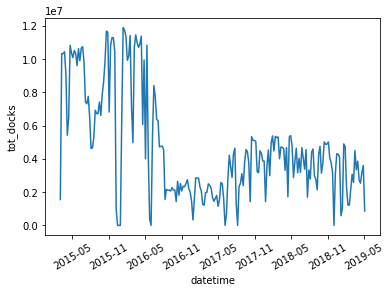

In [22]:
# week vs total docks
sns.lineplot(data=df, x=df.index, y=df.tot_docks)
plt.xticks(rotation=30)

In [23]:
# month
month = dock.groupby(pd.Grouper(key="datetime", freq="M"))\
    .agg({'avail_bikes':'sum',
         'avail_docks':'sum',
         'tot_docks':'sum',
          'perc_bike_avail':'mean'})
df = month

(array([735780., 735964., 736146., 736330., 736511., 736695., 736876.,
        737060., 737241.]), <a list of 9 Text xticklabel objects>)

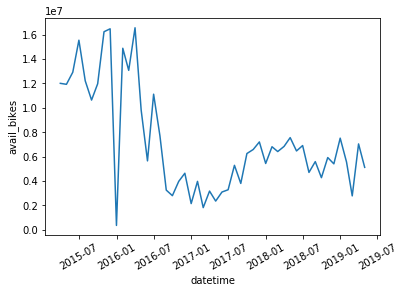

In [24]:
sns.lineplot(data=df, x=df.index, y=df.avail_bikes)
plt.xticks(rotation=30)

(array([735780., 735964., 736146., 736330., 736511., 736695., 736876.,
        737060., 737241.]), <a list of 9 Text xticklabel objects>)

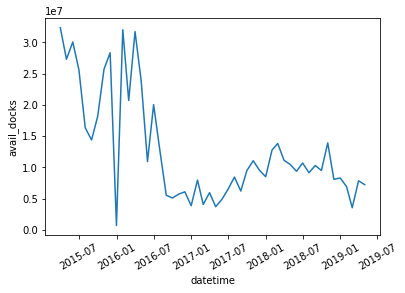

In [25]:
sns.lineplot(data=df, x=df.index, y=df.avail_docks)
plt.xticks(rotation=30)

(array([735780., 735964., 736146., 736330., 736511., 736695., 736876.,
        737060., 737241.]), <a list of 9 Text xticklabel objects>)

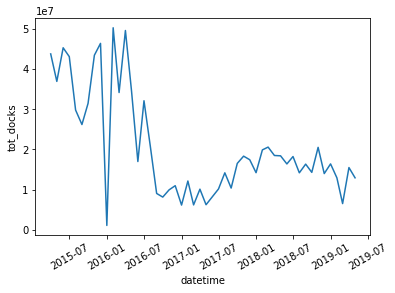

In [26]:
sns.lineplot(data=df, x=df.index, y=df.tot_docks)
plt.xticks(rotation=30)

(array([735719., 735903., 736085., 736269., 736450., 736634., 736815.,
        736999., 737180.]), <a list of 9 Text xticklabel objects>)

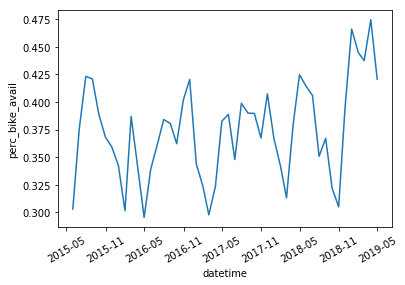

In [27]:
sns.lineplot(data=df, x=df.index, y=df.perc_bike_avail)
plt.xticks(rotation=30)

In [28]:
# year
yr = dock.groupby(pd.Grouper(key="datetime", freq="Y"))\
    .agg({'avail_bikes':'sum',
          'avail_docks':'sum',
          'tot_docks':'sum',
          'perc_bike_avail':'mean'})
df = yr
# fig = px.bar(df, x = df.index, y = "avail_bikes")
# fig.show()
# fig = px.bar(df, x = df.index, y = "avail_docks")
# fig.show()
# fig = px.bar(df, x = df.index, y = "tot_docks")
# fig.show()

(array([735903., 736085., 736269., 736450., 736634., 736815., 736999.,
        737180., 737364.]), <a list of 9 Text xticklabel objects>)

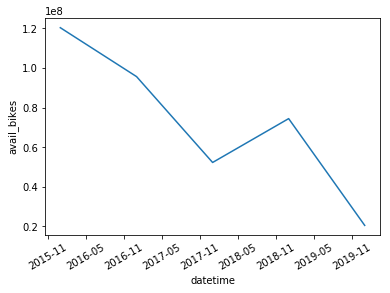

In [29]:
sns.lineplot(data=df, x=df.index, y=df.avail_bikes)
plt.xticks(rotation=30)

(array([735903., 736085., 736269., 736450., 736634., 736815., 736999.,
        737180., 737364.]), <a list of 9 Text xticklabel objects>)

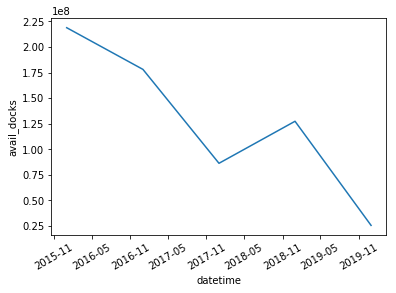

In [30]:
sns.lineplot(data=df, x=df.index, y=df.avail_docks)
plt.xticks(rotation=30)

(array([735903., 736085., 736269., 736450., 736634., 736815., 736999.,
        737180., 737364.]), <a list of 9 Text xticklabel objects>)

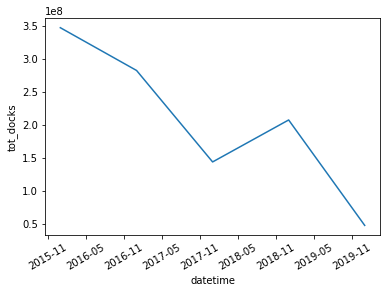

In [31]:
sns.lineplot(data=df, x=df.index, y=df.tot_docks)
plt.xticks(rotation=30)

(array([736389., 736511., 736634., 736754., 736876., 736999., 737119.,
        737241., 737364.]), <a list of 9 Text xticklabel objects>)

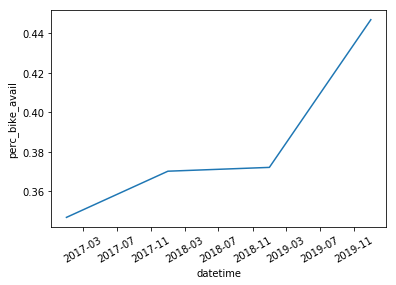

In [32]:
sns.lineplot(data=df, x=df.index, y=df.perc_bike_avail)
plt.xticks(rotation=30)

In [33]:
# real time station status 
url = 'https://gbfs.citibikenyc.com/gbfs/fr/station_status.json'

station_status = pd.read_json(path_or_buf = url)
station_status = pd.DataFrame(station_status.data[0])

In [34]:
station_status.head()#[['station_id', 'num_docks_available']]


,eightd_has_available_keys,is_installed,is_renting,is_returning,last_reported,legacy_id,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,num_ebikes_available,station_id,station_status
0,False,1,1,1,1607676544,72,10,1,44,0,2,72,active
1,False,1,1,1,1607670918,79,19,1,13,0,2,79,active
2,False,1,1,1,1607669418,82,13,3,11,0,2,82,active
3,False,1,1,1,1607668211,83,34,1,27,0,0,83,active
4,False,1,1,1,1607670625,116,17,2,31,0,2,116,active


In [35]:
station_status[station_status.station_status == 'active'][['station_id', 'num_docks_available']].shape

(1208, 2)

In [36]:
# free_bike_status - no info
url = 'https://gbfs.citibikenyc.com/gbfs/fr/free_bike_status.json'
free_bike_status = pd.read_json(path_or_buf = url)
free_bike_status

,data,last_updated,ttl
bikes,[],1607681800,5


In [37]:
# staion information
url = 'https://gbfs.citibikenyc.com/gbfs/fr/station_information.json'
station_info = pd.read_json(path_or_buf = url)
station_info = pd.DataFrame(station_info.data[0])
station_info

,capacity,eightd_has_key_dispenser,eightd_station_services,electric_bike_surcharge_waiver,external_id,has_kiosk,lat,legacy_id,lon,name,region_id,rental_methods,rental_url,short_name,station_id,station_type
0,55,False,[],False,66db237e-0aca-11e7-82f6-3863bb44ef7c,True,40.767272,72,-73.993929,W 52 St & 11 Ave,71,"[CREDITCARD, KEY]",http://app.citibikenyc.com/S6Lr/IBV092JufD?sta...,6926.01,72,classic
1,33,False,[],False,66db269c-0aca-11e7-82f6-3863bb44ef7c,True,40.719116,79,-74.006667,Franklin St & W Broadway,71,"[CREDITCARD, KEY]",http://app.citibikenyc.com/S6Lr/IBV092JufD?sta...,5430.08,79,classic
2,27,False,[],False,66db277a-0aca-11e7-82f6-3863bb44ef7c,True,40.711174,82,-74.000165,St James Pl & Pearl St,71,"[CREDITCARD, KEY]",http://app.citibikenyc.com/S6Lr/IBV092JufD?sta...,5167.06,82,classic
3,62,False,[],False,66db281e-0aca-11e7-82f6-3863bb44ef7c,True,40.683826,83,-73.976323,Atlantic Ave & Fort Greene Pl,71,"[CREDITCARD, KEY]",http://app.citibikenyc.com/S6Lr/IBV092JufD?sta...,4354.07,83,classic
4,50,False,[],False,66db28b5-0aca-11e7-82f6-3863bb44ef7c,True,40.741776,116,-74.001497,W 17 St & 8 Ave,71,"[CREDITCARD, KEY]",http://app.citibikenyc.com/S6Lr/IBV092JufD?sta...,6148.02,116,classic
5,53,False,[],False,66db2953-0aca-11e7-82f6-3863bb44ef7c,True,40.696089,119,-73.978034,Park Ave & St Edwards St,71,"[CREDITCARD, KEY]",http://app.citibikenyc.com/S6Lr/IBV092JufD?sta...,4700.06,119,classic
6,19,False,[],False,66db29e6-0aca-11e7-82f6-3863bb44ef7c,True,40.686768,120,-73.959282,Lexington Ave & Classon Ave,71,"[CREDITCARD, KEY]",http://app.citibikenyc.com/S6Lr/IBV092JufD?sta...,4452.03,120,classic
7,31,False,[],False,66db2a71-0aca-11e7-82f6-3863bb44ef7c,True,40.731724,127,-74.006744,Barrow St & Hudson St,71,"[CREDITCARD, KEY]",http://app.citibikenyc.com/S6Lr/IBV092JufD?sta...,5805.05,127,classic
8,56,False,[],False,66db2afe-0aca-11e7-82f6-3863bb44ef7c,True,40.727103,128,-74.002971,MacDougal St & Prince St,71,"[CREDITCARD, KEY]",http://app.citibikenyc.com/S6Lr/IBV092JufD?sta...,5687.04,128,classic
9,24,False,[],False,66db2d2b-0aca-11e7-82f6-3863bb44ef7c,True,40.692395,143,-73.993379,Clinton St & Joralemon St,71,"[CREDITCARD, KEY]",http://app.citibikenyc.com/S6Lr/IBV092JufD?sta...,4605.04,143,classic
